In [11]:
import pandas as pd
import numpy as np
import osmnx as ox
import os
import folium
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
project_dir = os.path.join(os.path.expanduser('~'), 'Documents', 'mapdescriptor')
concat = os.path.join

In [2]:
north = -6.9875
west = -37.3303
south = -7.0882
east = -37.2215
pois = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'amenity':True})
pois = pois[['amenity', 'name', 'geometry', 'opening_hours']]
pois

amenity                        name  \
element_type osmid                                                      
node         1798496605              fuel                 Posto Viola   
             1798496642              taxi  Moto táxi Praça dos Pombos   
             1798525769              taxi       Táxi Rodoviária Velha   
             1798525772              taxi    Táxi Fórum Miguel Sátiro   
             1798919196               bar                 Bar do Rock   
...                                   ...                         ...   
way          1084925006  place_of_worship                         NaN   
             1085721565  place_of_worship    Capela da Cruz da Menina   
             1098137716            school                         NaN   
             1112595201  place_of_worship                         NaN   
relation     7375603          marketplace             Mercado Público   

                                                                  geometry  \
element_type osmid                                                           
node         1798496605                         POINT (-37.27847 -7.02390)   
             1798496642                         POINT (-37.27843 -7.02361)   
             1798525769                         POINT (-37.27735 -7.02265)   
             1798525772                         POINT (-37.27702 -7.02601)   
             1798919196                         POINT (-37.27702 -7.02204)   
...                                                                    ...   
way          1084925006  POLYGON ((-37.27436 -7.00392, -37.27443 -7.003...   
             1085721565  POLYGON ((-37.30224 -7.00568, -37.30223 -7.005...   
             1098137716  POLYGON ((-37.27944 -7.06101, -37.27924 -7.060...   
             1112595201  POLYGON ((-37.23823 -7.06129, -37.23823 -7.061...   
relation     7375603     POLYGON ((-37.27953 -7.02765, -37.27953 -7.027...   

                                                      opening_hours  
element_type osmid                                                   
node         1798496605                                         NaN  
             1798496642                                         NaN  
             1798525769                                         NaN  
             1798525772                                         NaN  
             1798919196  We-Su 19:00-02:00+; week 25-26 18:00-04:00  
...                                                             ...  
way          1084925006                                         NaN  
             1085721565                                         NaN  
             1098137716                                         NaN  
             1112595201                                         NaN  
relation     7375603                              Mo-Sa 07:00-17:00  

[829 rows x 4 columns]

In [3]:
churches = pois.loc[pois['amenity']=='place_of_worship']
churches

amenity  \
element_type osmid                          
node         4452476514  place_of_worship   
             4474143070  place_of_worship   
             4986525323  place_of_worship   
             5002188221  place_of_worship   
             5734776131  place_of_worship   
...                                   ...   
way          1007112305  place_of_worship   
             1084529487  place_of_worship   
             1084925006  place_of_worship   
             1085721565  place_of_worship   
             1112595201  place_of_worship   

                                                                name  \
element_type osmid                                                     
node         4452476514            Catedral de Nossa Senhora da Guia   
             4474143070                      Igreja de São Sebastião   
             4986525323      Igreja Evangélica Batista no Salgadinho   
             5002188221                           Assembleia de Deus   
             5734776131  IPB - Segunda Igreja Presbiteriana De Patos   
...                                                              ...   
way          1007112305                           Assembleia de Deus   
             1084529487                    Igreja de São Judas Tadeu   
             1084925006                                          NaN   
             1085721565                     Capela da Cruz da Menina   
             1112595201                                          NaN   

                                                                  geometry  \
element_type osmid                                                           
node         4452476514                         POINT (-37.27608 -7.02793)   
             4474143070                         POINT (-37.27472 -7.01844)   
             4986525323                         POINT (-37.26547 -7.02066)   
             5002188221                         POINT (-37.29964 -7.00711)   
             5734776131                         POINT (-37.29813 -7.03545)   
...                                                                    ...   
way          1007112305  POLYGON ((-37.26348 -7.01800, -37.26343 -7.018...   
             1084529487  POLYGON ((-37.26861 -7.01341, -37.26847 -7.013...   
             1084925006  POLYGON ((-37.27436 -7.00392, -37.27443 -7.003...   
             1085721565  POLYGON ((-37.30224 -7.00568, -37.30223 -7.005...   
             1112595201  POLYGON ((-37.23823 -7.06129, -37.23823 -7.061...   

                        opening_hours  
element_type osmid                     
node         4452476514           NaN  
             4474143070           NaN  
             4986525323           NaN  
             5002188221           NaN  
             5734776131           NaN  
...                               ...  
way          1007112305           NaN  
             1084529487           NaN  
             1084925006           NaN  
             1085721565           NaN  
             1112595201           NaN  

[39 rows x 4 columns]

In [4]:
def get_coordinates(point):
    if type(point) == 'shapely.geometry.point.Point':
        lng, lat = point.coords[0]
    else:
        lng, lat = point.centroid.coords[0]
    return lng, lat

lngs, lats = zip(*churches['geometry'].apply(get_coordinates).values)

In [5]:
# choose the tile for map:
# https://leaflet-extras.github.io/leaflet-providers/preview/

In [7]:
#folium.Map(location=[-7.03, -37.28], tiles='cartodbpositronnolabels', zoom_start=14)


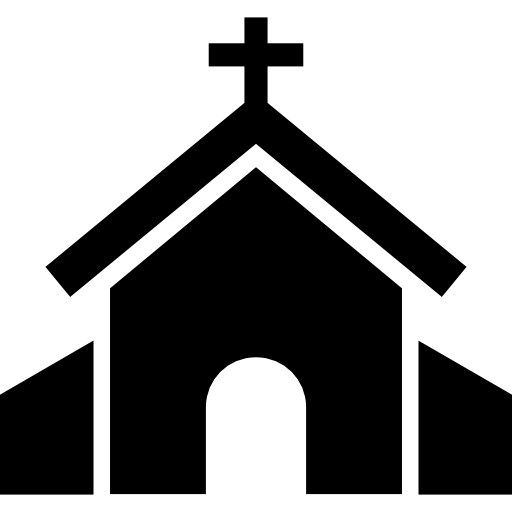
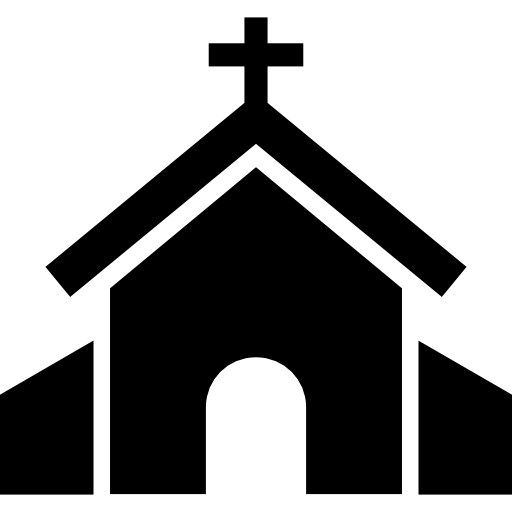
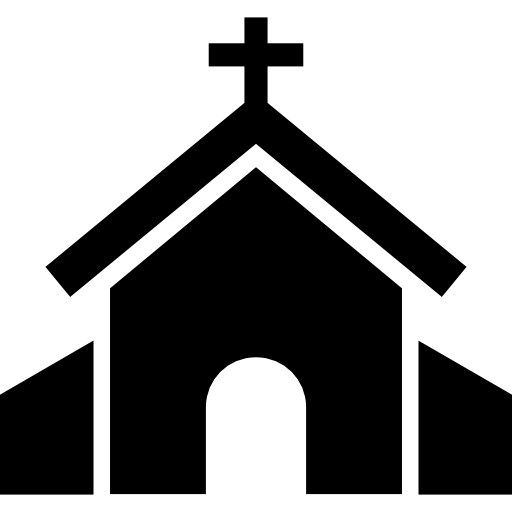
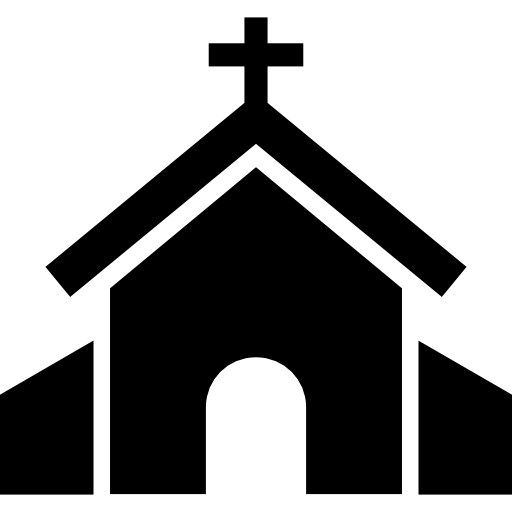
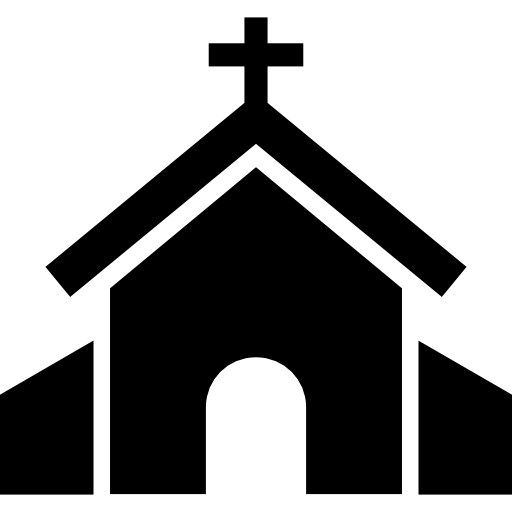
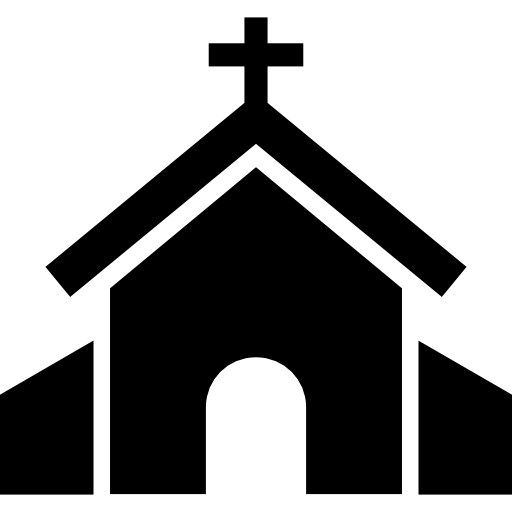
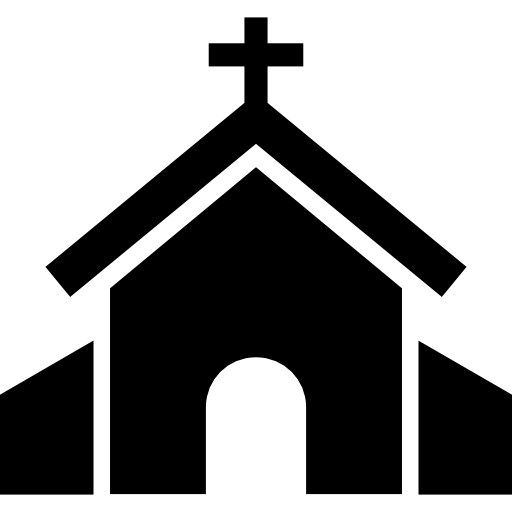
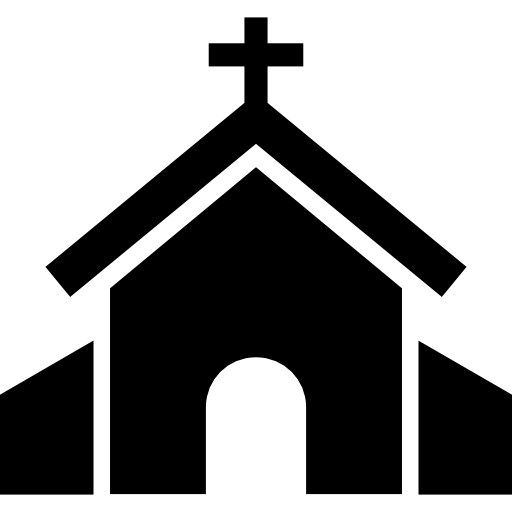
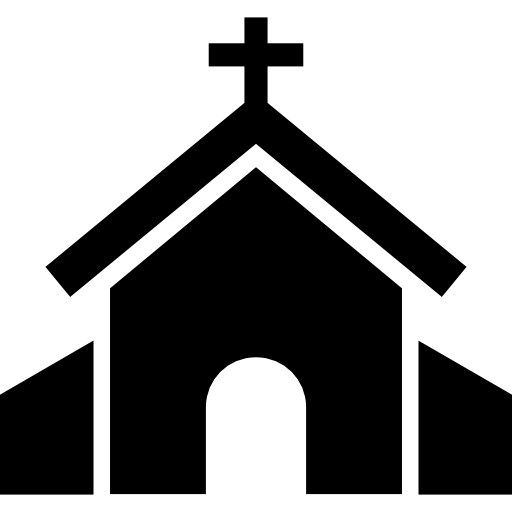
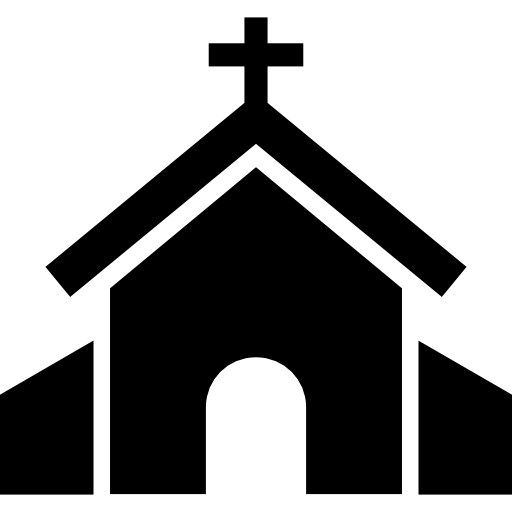
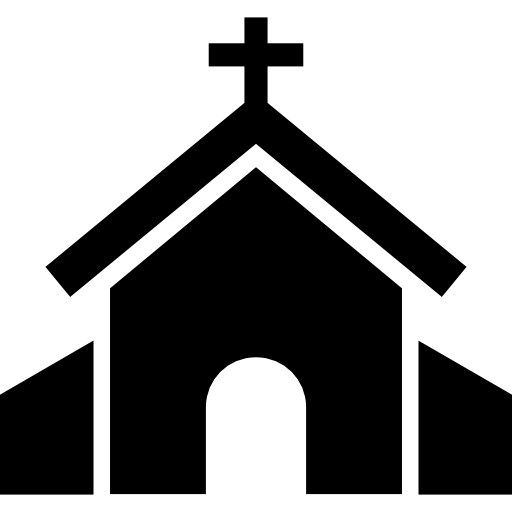
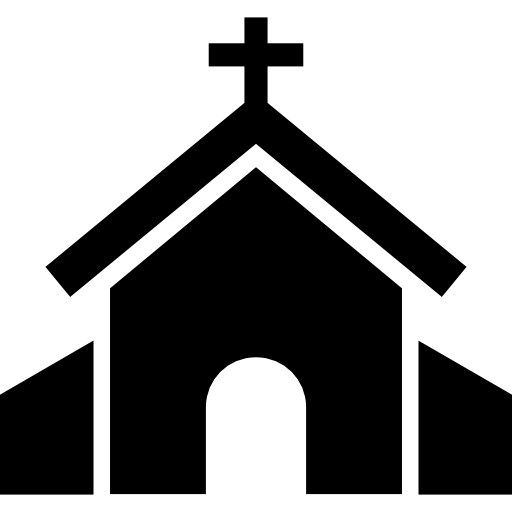
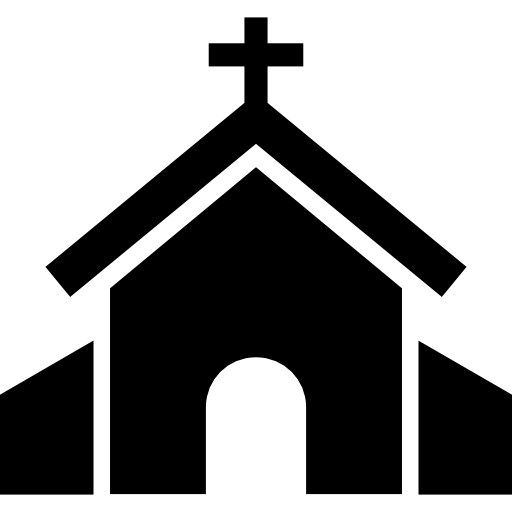
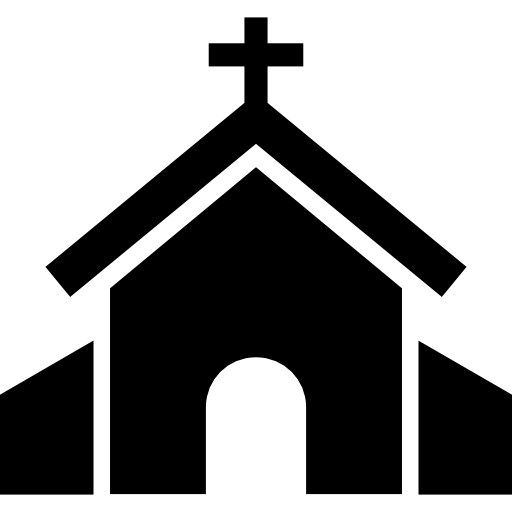
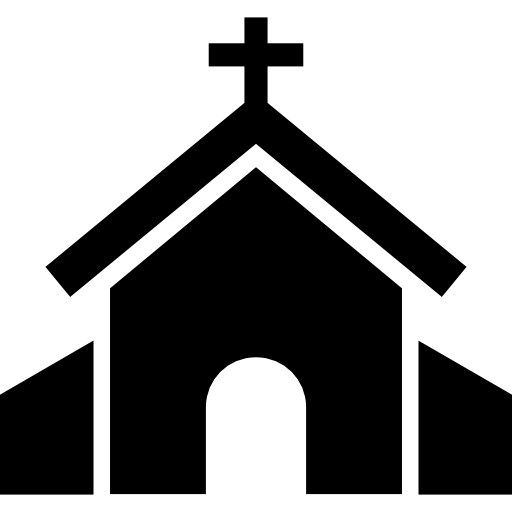
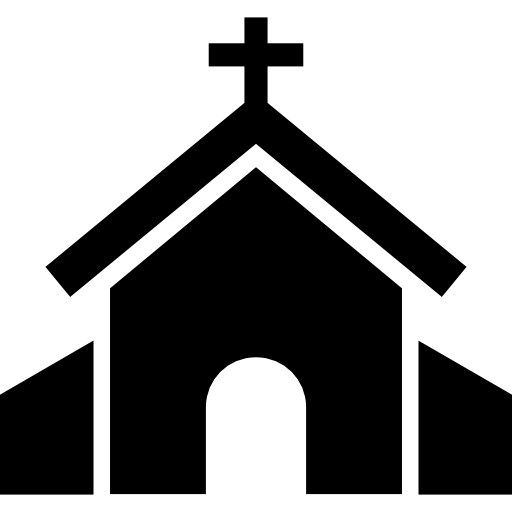
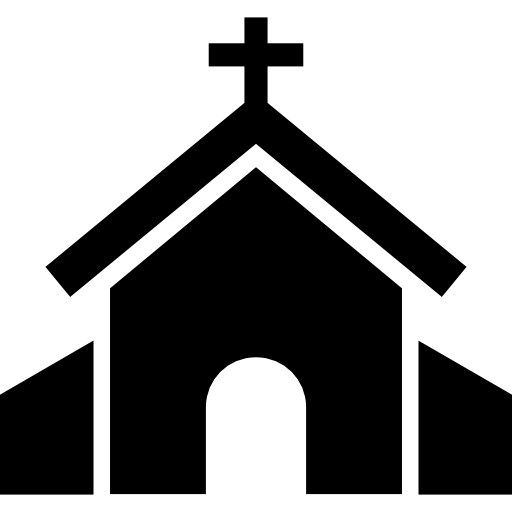
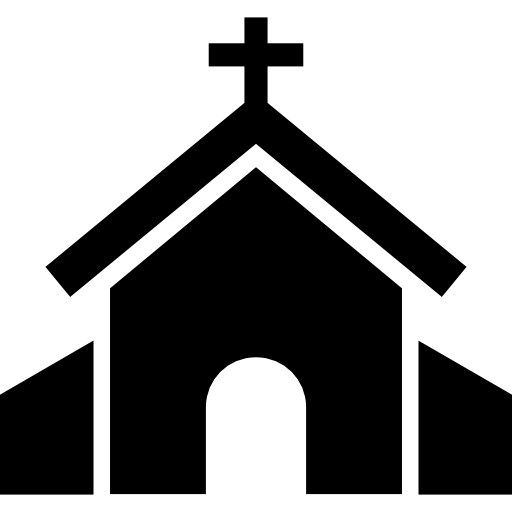
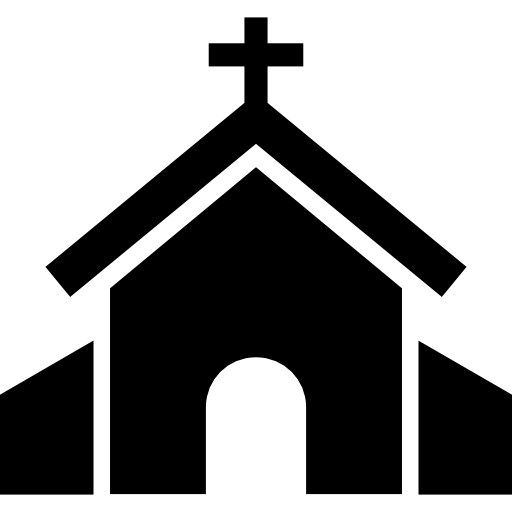
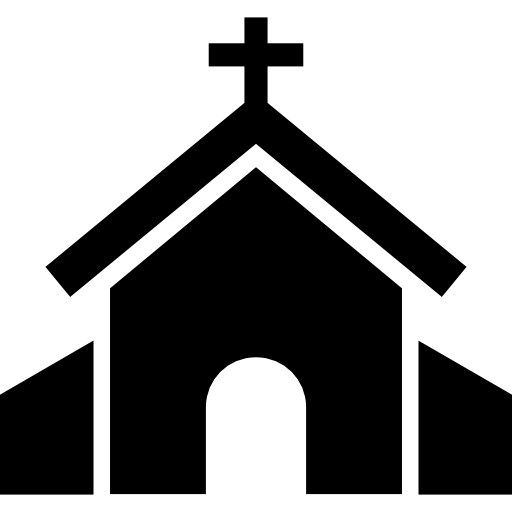
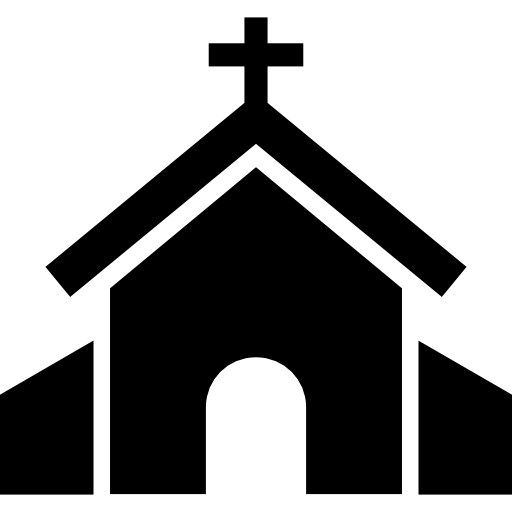
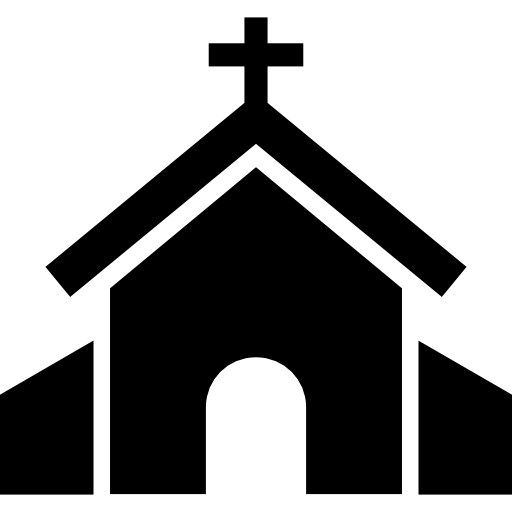
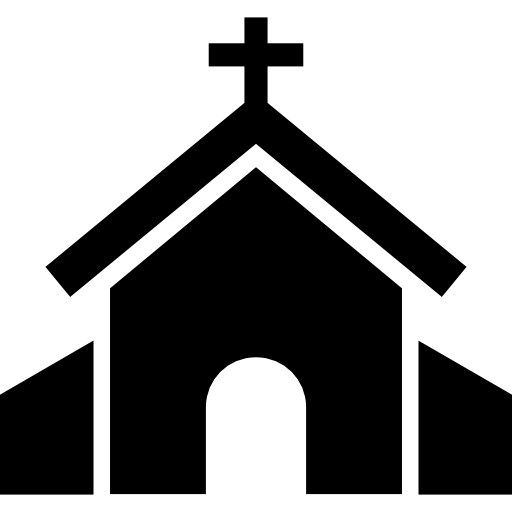
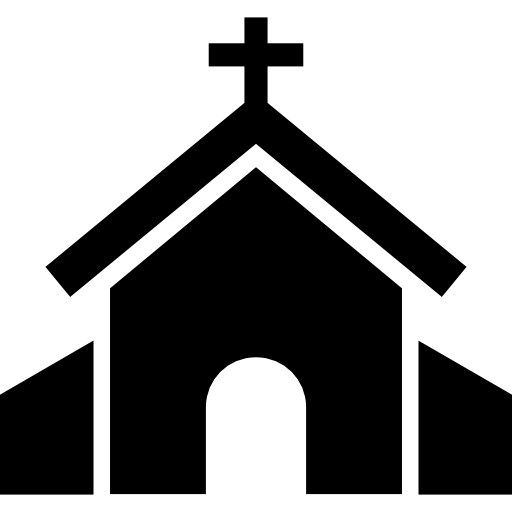
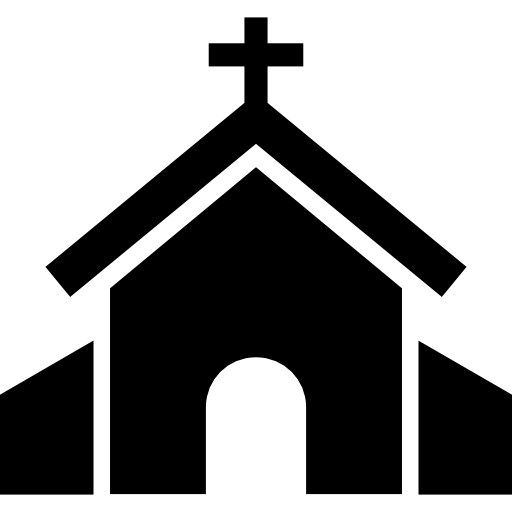
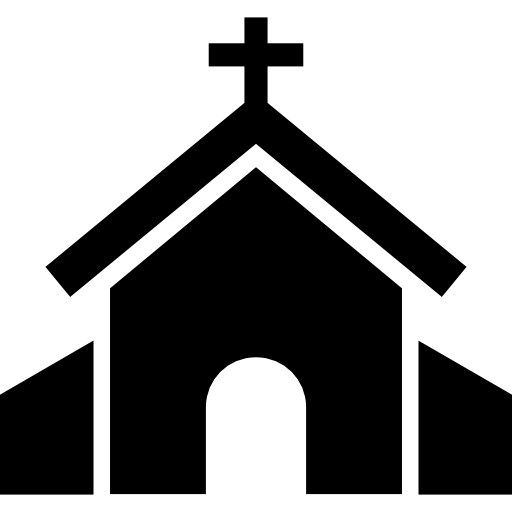
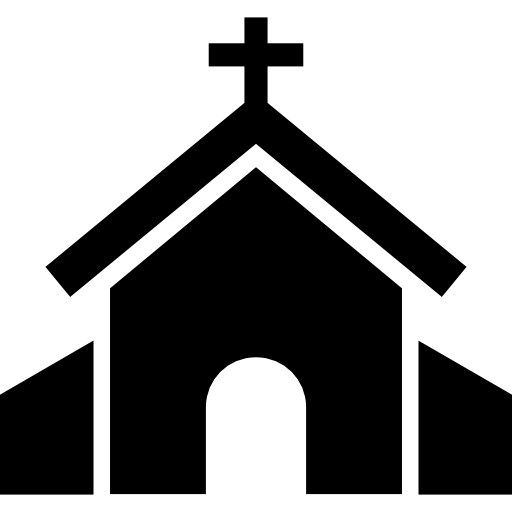
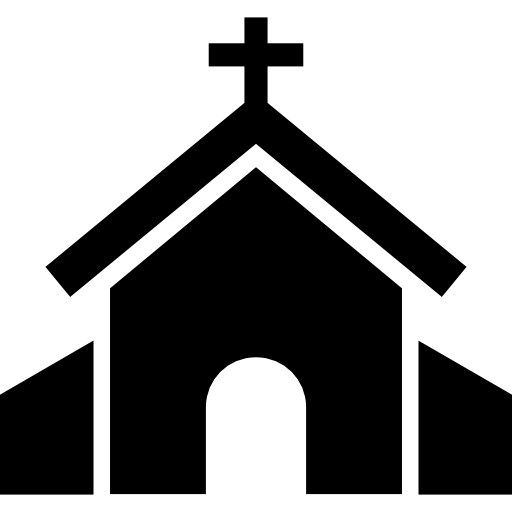
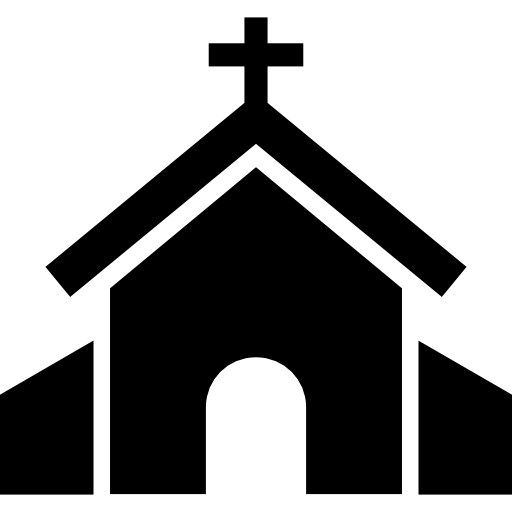
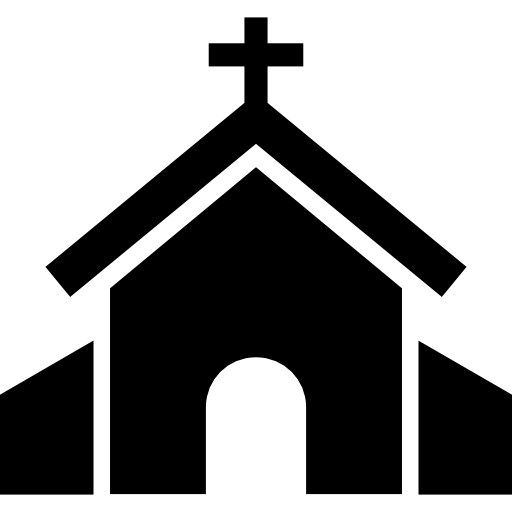
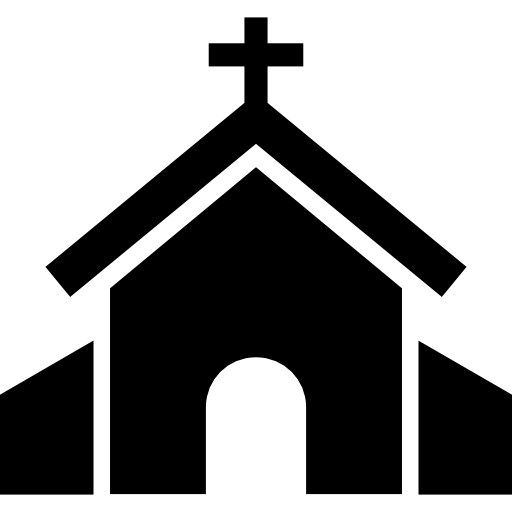
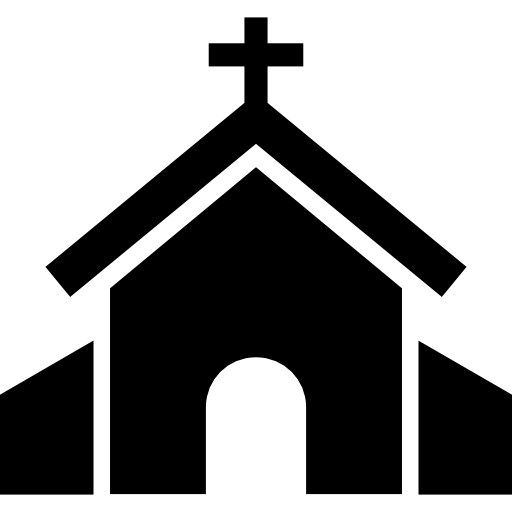
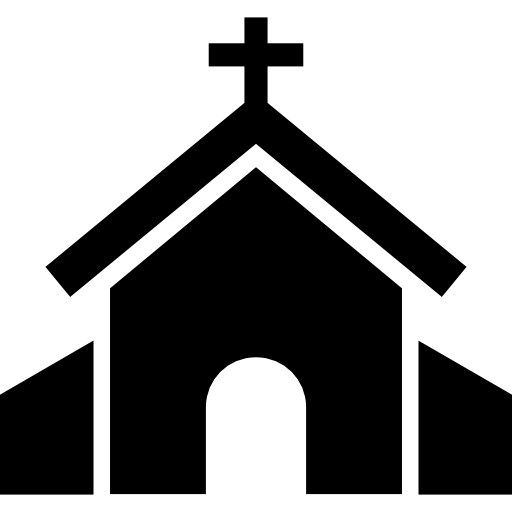
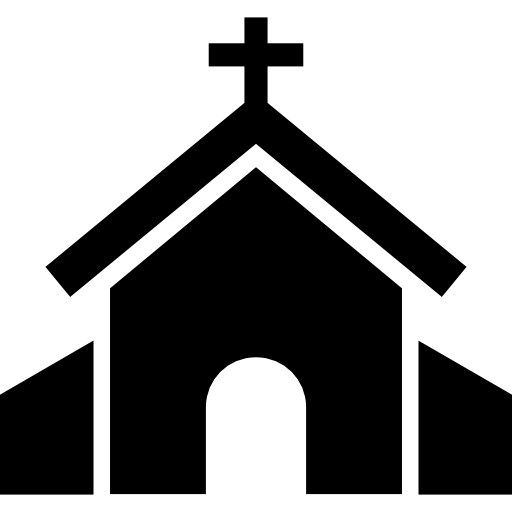
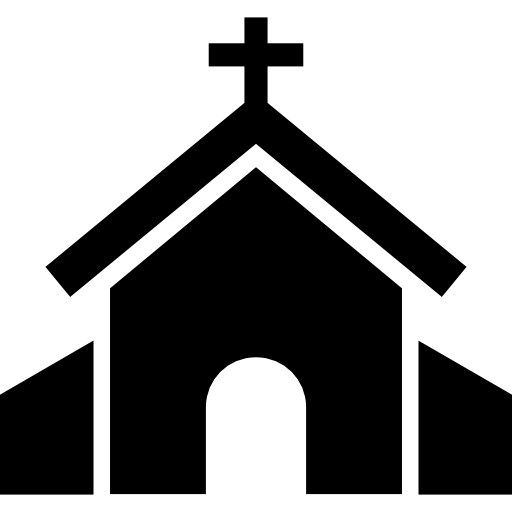
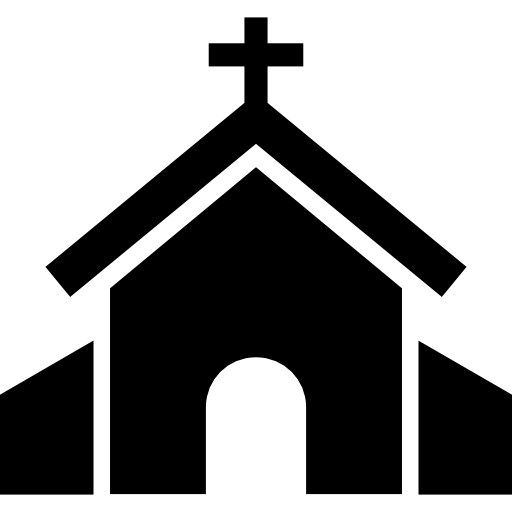
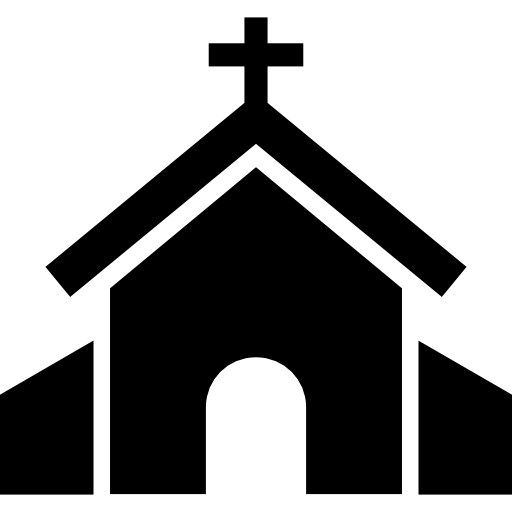
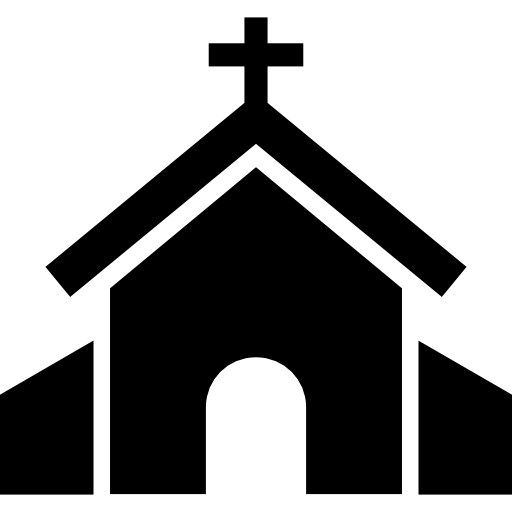
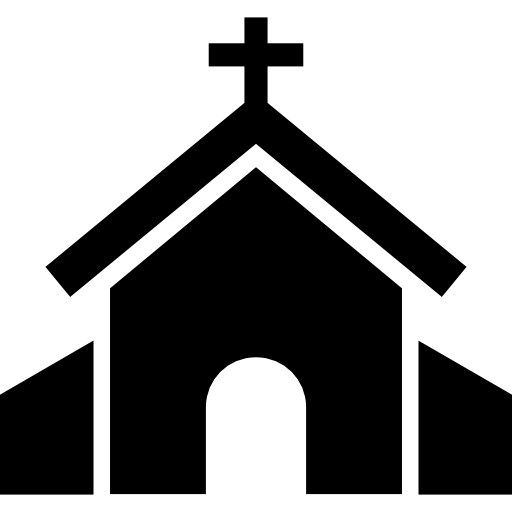

In [20]:
mapa = folium.Map(location=[-7.03, -37.28], tiles='https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png', attr='CartoDB.Voyager', zoom_start=14)
for lat, lng in zip(lats, lngs):
    folium.Marker(location=[lat,lng],popup='Church',tooltip='<strong>Church</strong>',
              icon=folium.features.CustomIcon(concat(project_dir, 'icons', 'church-icon.png'),icon_size=(20,20))).add_to(mapa)
mapa

In [19]:
pois.amenity.value_counts()

parking           96
fast_food         75
bar               70
restaurant        69
bench             67
                  ..
shower             1
payment_centre     1
love_hotel         1
music_school       1
events_venue       1
Name: amenity, Length: 60, dtype: int64

In [24]:
# https://www.sjjb.co.uk/mapicons/downloads
# https://github.com/openstreetmap/map-icons
# https://wiki.openstreetmap.org/wiki/Map_features
# https://wiki.openstreetmap.org/wiki/Map_Icons#Internal_Icon_collections

In [22]:
# https://wiki.openstreetmap.org/wiki/Key:amenity